In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [130]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [131]:
# Add 'overweight' column
df['overweight'] = ((df['weight'] / (df['height']*0.01)**2) > 25).astype(int)

In [132]:
df.tail(20)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
69980,99971,17727,2,167,69.0,110,80,1,1,0,1,0,0,0
69981,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1,1
69982,99973,18941,1,153,86.0,130,90,1,2,0,0,1,1,1
69983,99974,19652,1,165,72.0,120,80,1,1,0,0,1,0,1
69984,99975,17926,2,168,80.0,120,80,1,1,0,0,1,1,1
69985,99977,18194,1,156,102.0,130,80,1,1,0,1,0,1,1
69986,99978,18198,2,180,78.0,120,80,1,1,0,0,1,0,0
69987,99979,18852,1,151,49.0,120,80,1,1,0,0,1,0,0
69988,99981,21978,1,160,59.0,110,70,1,1,0,0,1,0,0
69989,99985,21013,1,157,83.0,120,70,1,1,0,0,1,1,1


In [133]:
df['cholesterol'] = (df['cholesterol'] == 1).astype(int)
df['gluc'] = (df['gluc'] == 1).astype(int)


In [137]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, 
# make the value 0. If the value is more than 1, make the value 1.

# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,1
1,1,cholesterol,0
2,1,cholesterol,0
3,1,cholesterol,1
4,0,cholesterol,1


In [138]:
# Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
df_cat = pd.melt(df, var_name = 'variable', value_vars = ['active','alco','cholesterol', 'gluc','overweight','smoke'], id_vars = 'cardio')

In [139]:
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


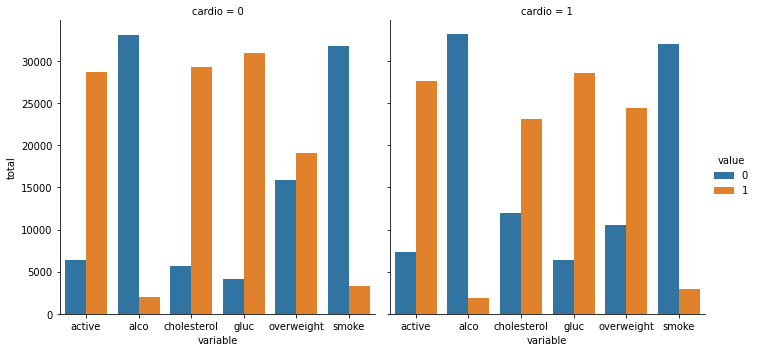

In [141]:
# Draw the catplot with 'sns.catplot()'
fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")

In [142]:
# Do not modify the next two lines
fig.savefig('catplot.png')

In [194]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
   (df['height'] >= df['height'].quantile(0.025)) &
   (df['height'] <= df['height'].quantile(0.975)) &
   (df['weight'] >= df['weight'].quantile(0.025)) &
   (df['weight'] <= df['weight'].quantile(0.975))]



In [195]:
# Calculate the correlation matrix
corr = round(df_heat.corr(method="pearson"),1)

In [196]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
age,0.0,1.0,-0.0,-0.1,0.1,0.0,0.2,-0.1,-0.1,-0.0,-0.0,-0.0,0.2,0.1
gender,0.0,-0.0,1.0,0.5,0.1,0.0,0.1,0.0,0.0,0.3,0.2,0.0,0.0,-0.1
height,0.0,-0.1,0.5,1.0,0.3,0.0,0.0,0.1,0.0,0.2,0.1,-0.0,-0.0,-0.1
weight,0.0,0.1,0.1,0.3,1.0,0.0,0.2,-0.1,-0.1,0.1,0.1,-0.0,0.2,0.7
ap_hi,0.0,0.0,0.0,0.0,0.0,1.0,0.1,-0.0,-0.0,-0.0,0.0,-0.0,0.1,0.0
ap_lo,0.0,0.2,0.1,0.0,0.2,0.1,1.0,-0.2,-0.1,0.0,0.0,0.0,0.3,0.2
cholesterol,-0.0,-0.1,0.0,0.1,-0.1,-0.0,-0.2,1.0,0.4,-0.0,-0.0,-0.0,-0.2,-0.1
gluc,-0.0,-0.1,0.0,0.0,-0.1,-0.0,-0.1,0.4,1.0,0.0,-0.0,0.0,-0.1,-0.1
smoke,-0.0,-0.0,0.3,0.2,0.1,-0.0,0.0,-0.0,0.0,1.0,0.3,0.0,-0.0,-0.0


In [197]:
# Generate a mask for the upper triangle
mask = np.triu(corr)

<AxesSubplot:>

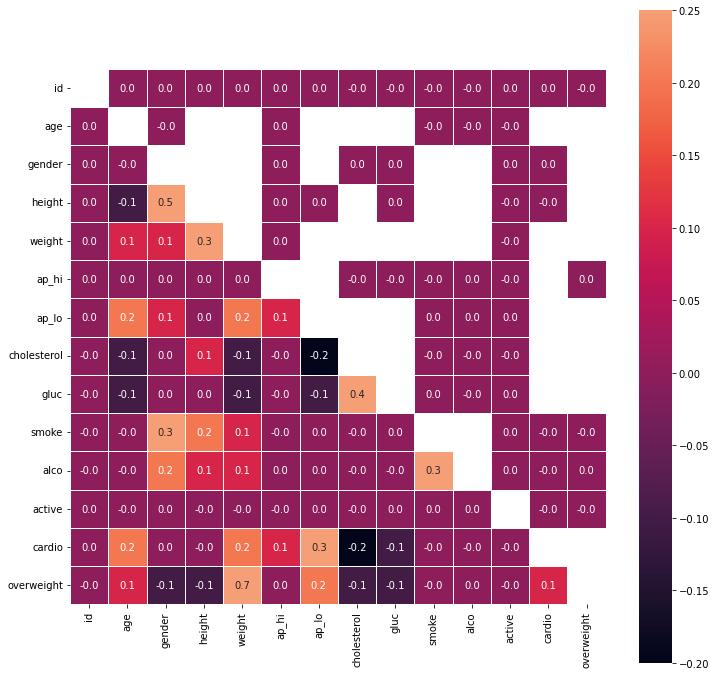

In [198]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 12))

# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, vmax=.25 ,square=True, fmt='.1f', cmap="rocket", center=0.08)

In [ ]:
# Do not modify the next two lines
fig.savefig('heatmap.png')
##return fig